In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

,temperature,humidity,wind_speed,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.shape

(2200, 5)

In [4]:
data.isnull().sum()

temperature    0
humidity       0
wind_speed     0
rainfall       0
label          0
dtype: int64

C:\Users\vijay\AppData\Local\Temp\ipykernel_14248\2848616696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')


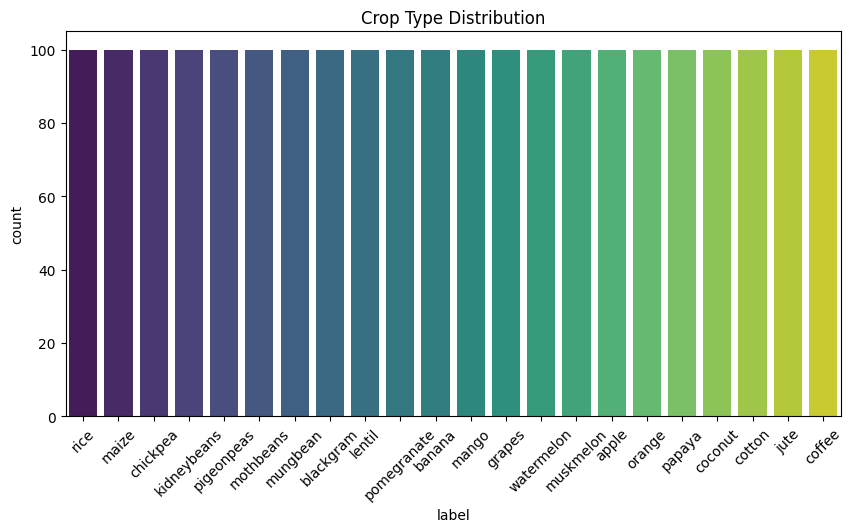

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Crop Type Distribution')
plt.show()

In [6]:
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [14]:
imputer = SimpleImputer(strategy='mean')
data[['temperature', 'humidity', 'wind_speed', 'rainfall']] = imputer.fit_transform(
    data[['temperature', 'humidity', 'wind_speed', 'rainfall']]
)

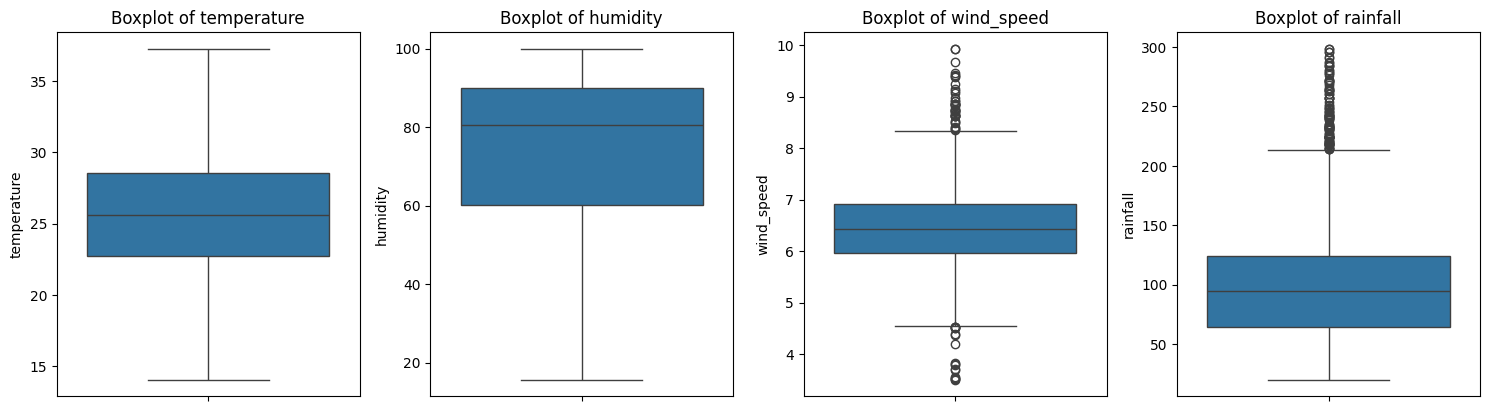

In [15]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(['temperature', 'humidity', 'wind_speed', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [16]:
#Handle Outliers
#IQR method to identify and cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in [ 'temperature', 'humidity', 'wind_speed', 'rainfall']:
    cap_outliers(data, col)

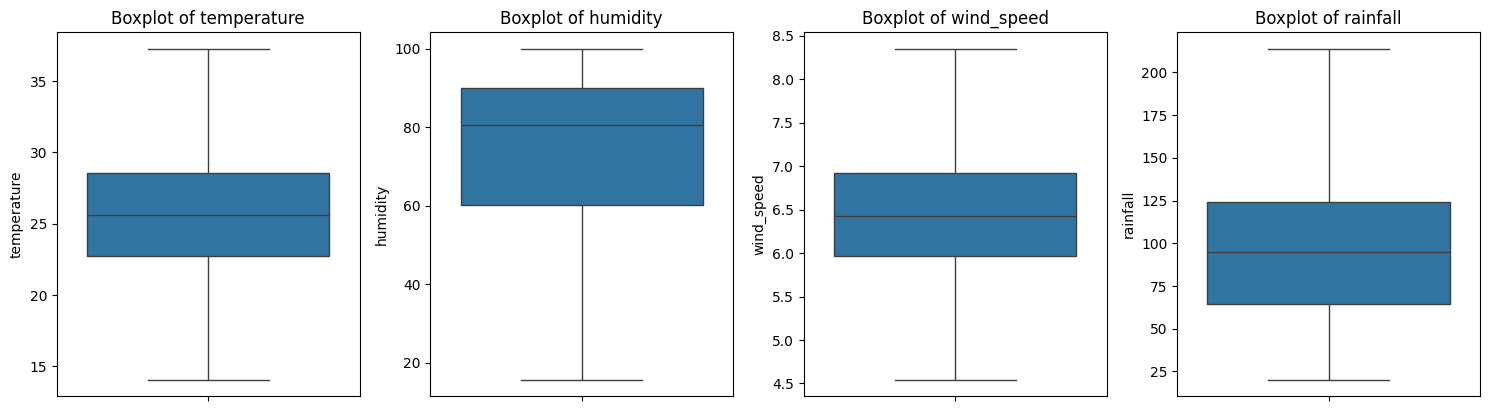

In [17]:
# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate([ 'temperature', 'humidity', 'wind_speed', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

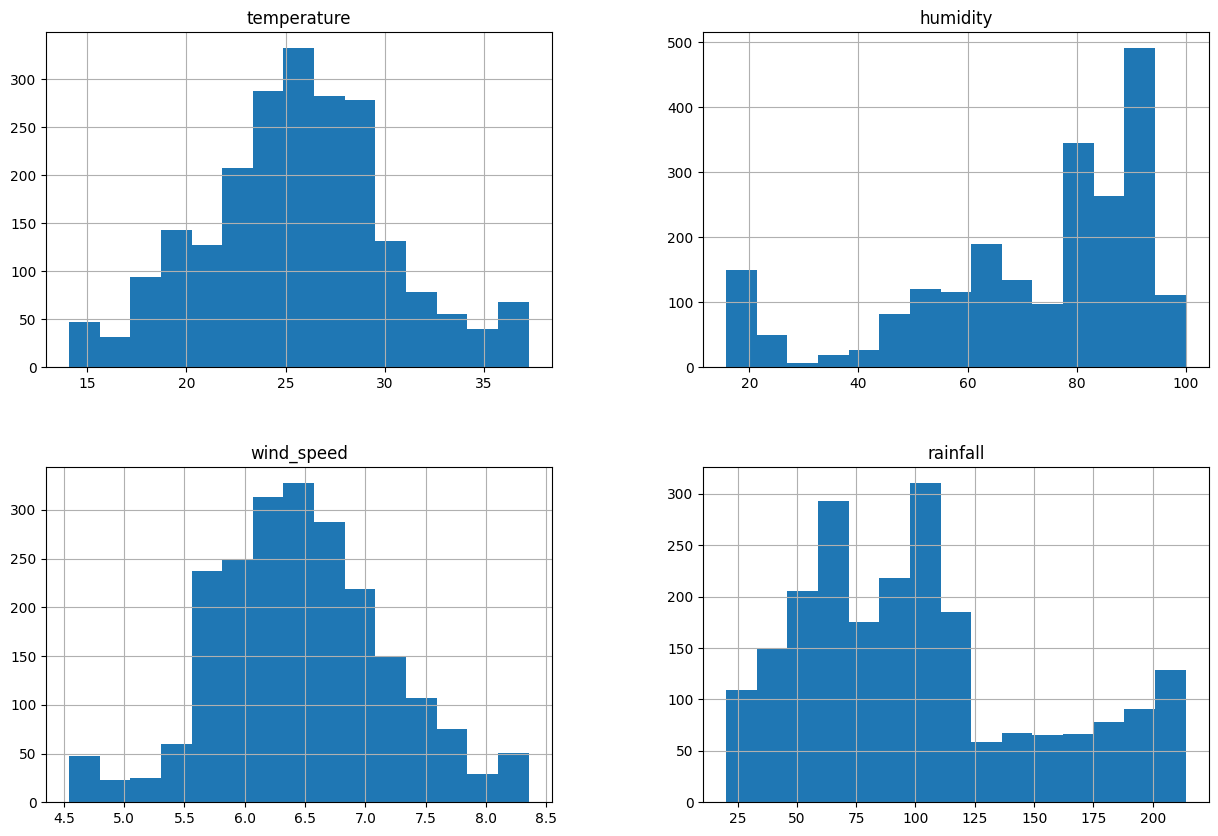

In [18]:
# Histograms for the numerical cols
data[['temperature', 'humidity', 'wind_speed', 'rainfall']].hist(bins=15, figsize=(15, 10))
plt.show()

C:\Users\vijay\AppData\Local\Temp\ipykernel_14248\1610543591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


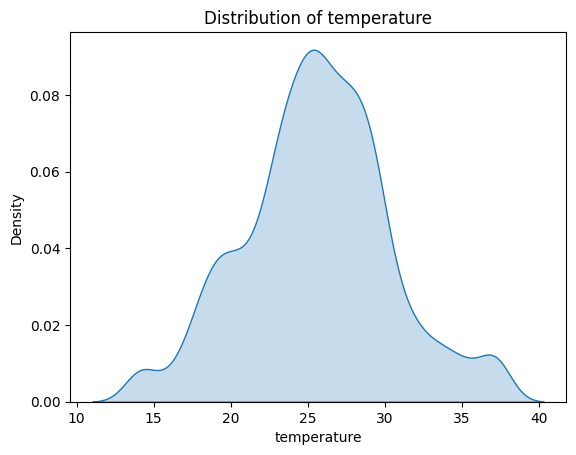

C:\Users\vijay\AppData\Local\Temp\ipykernel_14248\1610543591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


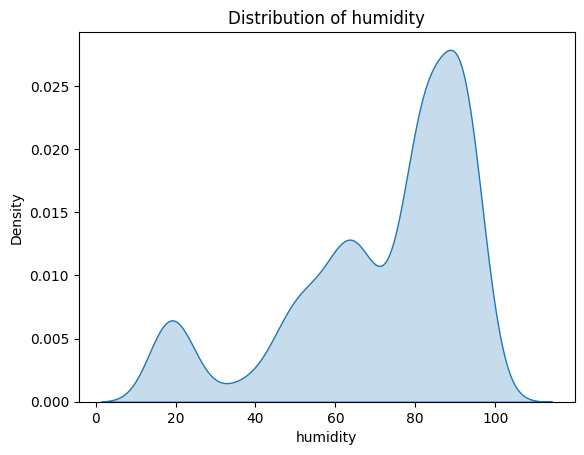

C:\Users\vijay\AppData\Local\Temp\ipykernel_14248\1610543591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


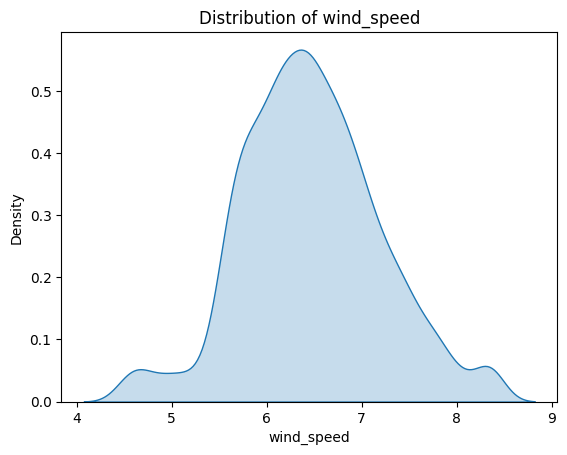

C:\Users\vijay\AppData\Local\Temp\ipykernel_14248\1610543591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


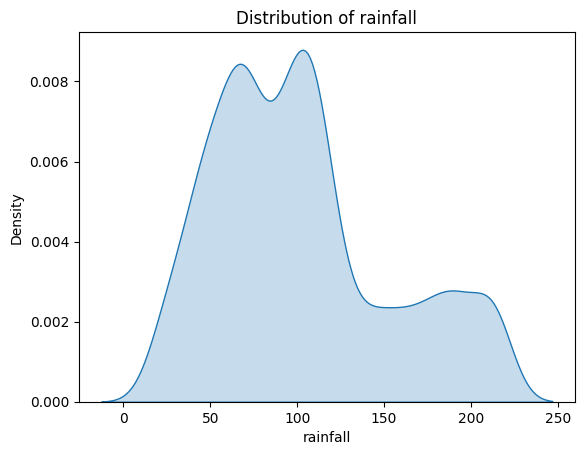

In [19]:
# KDE plots for numerical features
for col in ['temperature', 'humidity', 'wind_speed', 'rainfall']:
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

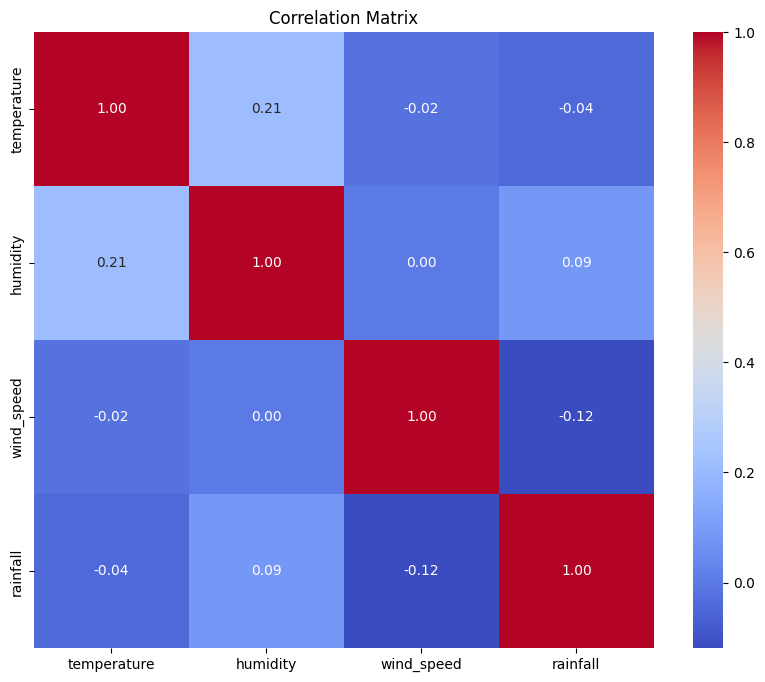

In [20]:
# Select only numeric cols
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

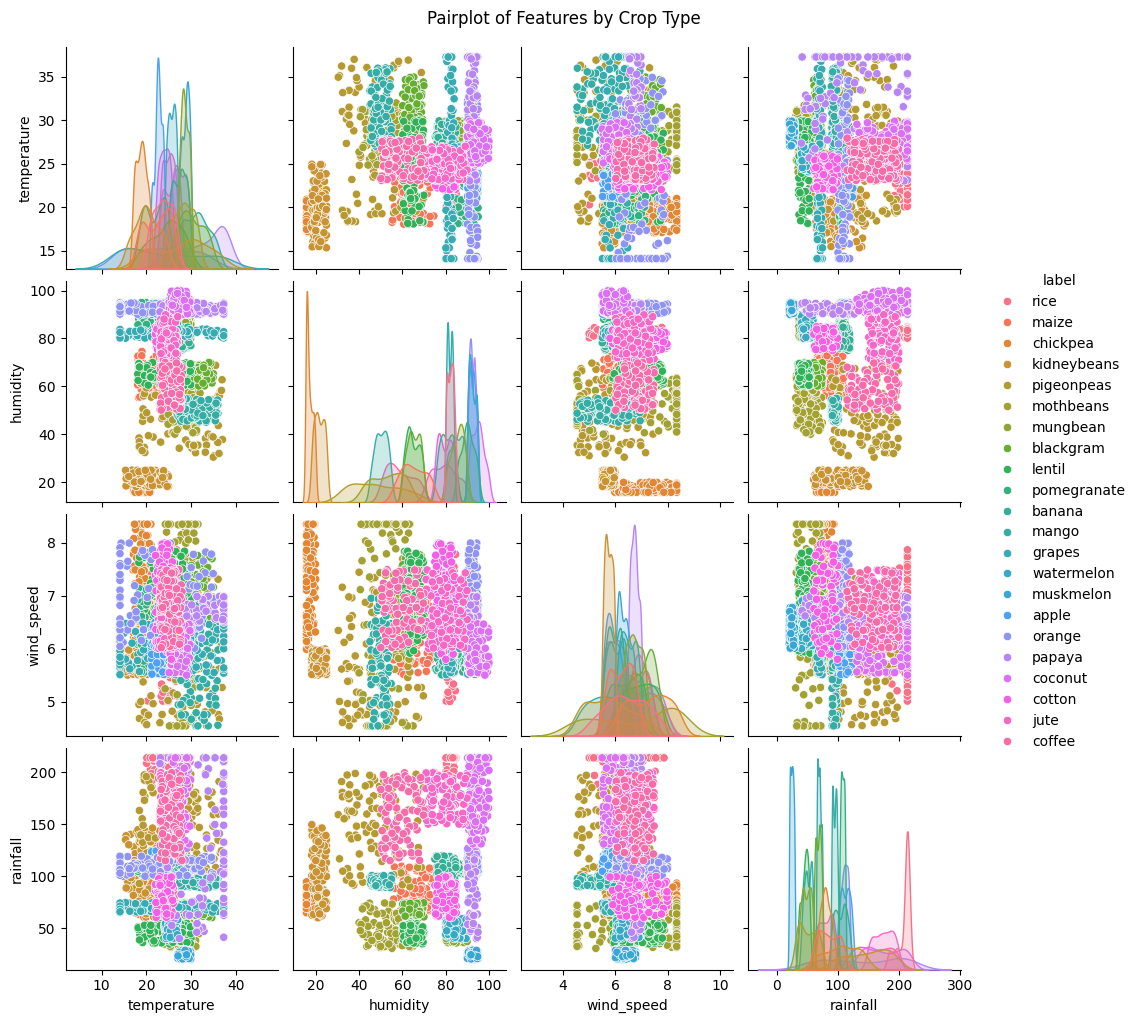

In [21]:
# Pairplot
sns.pairplot(data, vars=['temperature', 'humidity', 'wind_speed', 'rainfall'], hue='label', palette='husl')
plt.suptitle("Pairplot of Features by Crop Type", y=1.02)
plt.show()

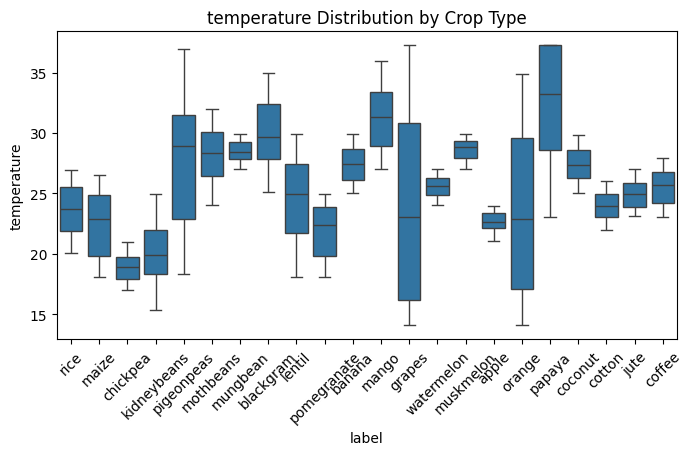

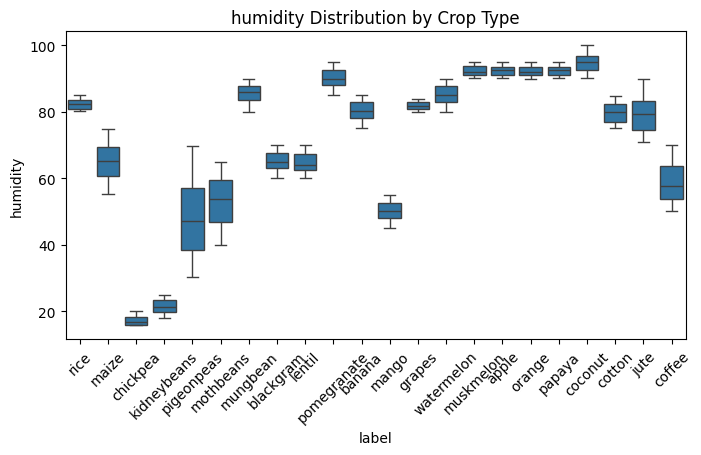

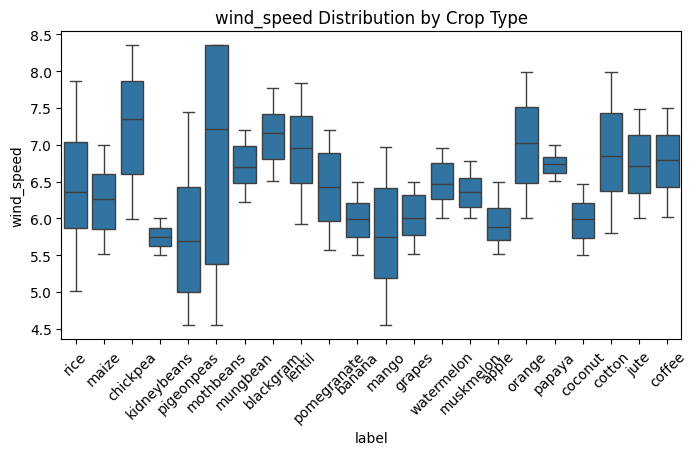

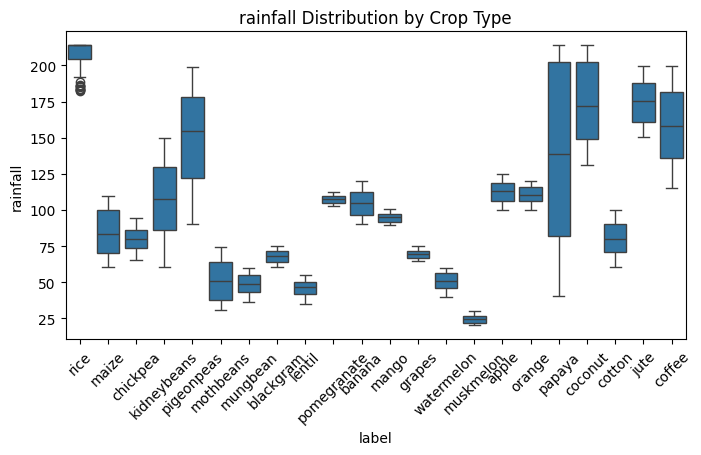

In [22]:
# Boxplots of features grouped by crop
for col in ['temperature', 'humidity', 'wind_speed', 'rainfall']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

             temperature   humidity  wind_speed    rainfall
label                                                      
apple          22.630942  92.333383    5.929663  112.654779
banana         27.376798  80.358123    5.983893  104.626980
blackgram      29.973340  65.118426    7.133952   67.884151
chickpea       18.872847  17.114928    7.295763   80.058977
coconut        27.409892  94.844272    5.976562  174.697366
coffee         25.540477  58.869846    6.790308  158.066295
cotton         23.988958  79.843474    6.912675   80.398043
grapes         24.084137  81.875228    6.025937   69.611829
jute           24.958376  79.639864    6.732778  174.792798
kidneybeans    20.115085  21.605357    5.749411  105.919778
lentil         24.509052  64.804785    6.927932   45.680454
maize          22.389204  65.092249    6.245190   84.766988
mango          31.208770  50.156573    5.766916   94.704515
mothbeans      28.194920  53.160418    6.755765   51.198487
mungbean       28.525775  85.499975    6

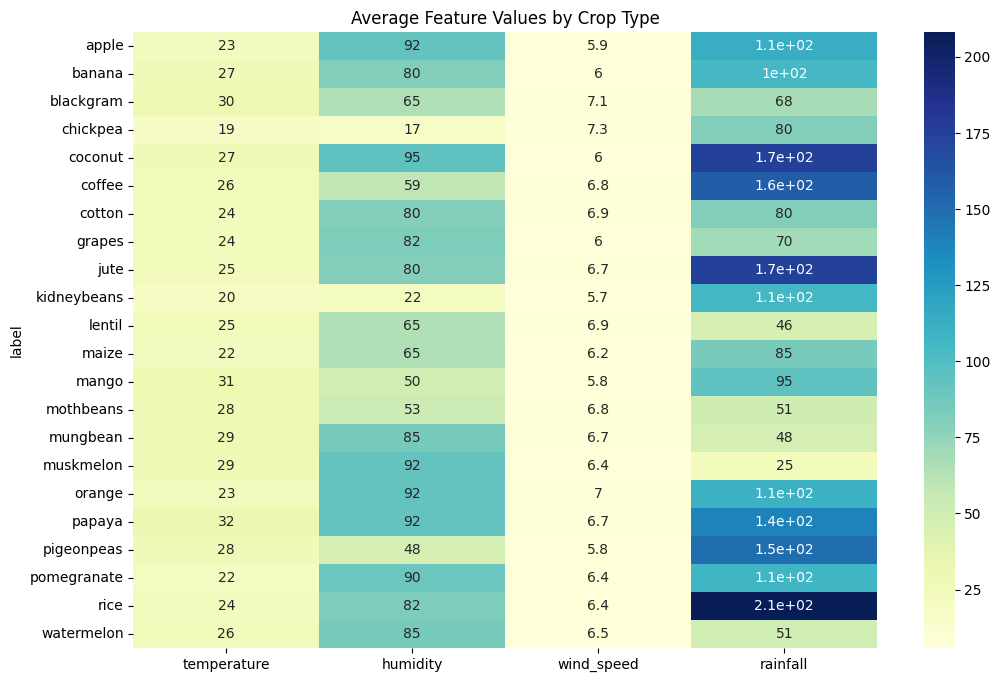

In [23]:
crop_mean = data.groupby('label').mean()
print(crop_mean)

plt.figure(figsize=(12, 8))
sns.heatmap(crop_mean, annot=True, cmap='YlGnBu')
plt.title('Average Feature Values by Crop Type')
plt.show()

In [83]:
label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['label'])

In [25]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['temperature', 'humidity', 'wind_speed', 'rainfall']])
X = pd.DataFrame(scaled_features, columns=['temperature', 'humidity', 'wind_speed', 'rainfall'])
y = data['label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       apple       0.96      0.96      0.96        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       0.91      1.00      0.95        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      0.95      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.81      0.93      0.87        14
    

In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  1  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [31]:
import joblib

# Assuming `model` is your trained model
joblib.dump(model, 'model_rf.pkl')

['model_rf.pkl']